# Analysis und Modellierung

In [371]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.metrics import *
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [424]:
df = pd.read_csv('./data/price-monitoring-calculated.csv', index_col=0)

df = df[['rent', 'price_per_sqm', 'area', 'year_built', 'ren_potential', 'othershopsnearby', 'smallestdistancetonextoev', 'distancetomainstation', 'quartier_quartiergr', 'floor', 'altitude', 'distancetonightclubs']]
print(df.corr())
df = df.dropna()
df_train, df_test = train_test_split(df)

                               rent  price_per_sqm      area  year_built  \
rent                       1.000000       0.064694  0.693244    0.264439   
price_per_sqm              0.064694       1.000000 -0.558211   -0.072759   
area                       0.693244      -0.558211  1.000000    0.264359   
year_built                 0.264439      -0.072759  0.264359    1.000000   
ren_potential             -0.043476       0.018791 -0.066776    0.146719   
othershopsnearby           0.067387       0.184953 -0.058675   -0.321908   
smallestdistancetonextoev  0.165734      -0.098685  0.199300    0.168466   
distancetomainstation      0.041076      -0.106967  0.071970    0.368617   
altitude                   0.087101      -0.028329  0.107120    0.026153   
distancetonightclubs       0.067034      -0.090984  0.082071    0.415333   

                           ren_potential  othershopsnearby  \
rent                           -0.043476          0.067387   
price_per_sqm                   0.01879

## Welche Faktoren haben einen Einfluss auf die Miete?

### Wohnfläche
Wie der folgende Plot zeigt, gibt es einen deutlichen linearen Zusammenhang zwischen rent und area.

<AxesSubplot:xlabel='area', ylabel='rent'>

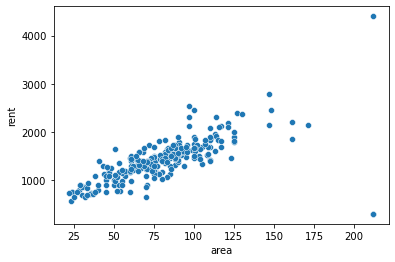

In [282]:
sns.scatterplot(data=df, x="area", y = "rent")

### Baujahr
Es gibt eine Korrelation zwischen year_built und rent, so sind Wohnungen in älteren Gebäuden tendentiell günstiger. Diese Korrelation ist aber schwach.

<AxesSubplot:xlabel='year_built', ylabel='rent'>

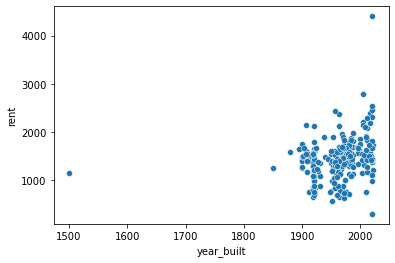

In [284]:
sns.scatterplot(data=df, x="year_built", y = "rent")

### Renovierung
Dieses Attribut sagt aus, ob eine Liegenschaft seit der Erstellung renoviert wurde.

<AxesSubplot:xlabel='ren_potential', ylabel='rent'>

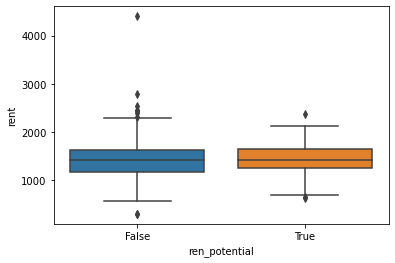

In [287]:
sns.boxplot(x="ren_potential", y="rent", data=df)

### Lärmbeleastung
Diese Attribute geben die Lärmbelasting in Dezibel währen des Tages und der Nacht an. Die Lärmbelastung korreliert nicht mit der rent.

<AxesSubplot:xlabel='LR_DAY', ylabel='rent'>

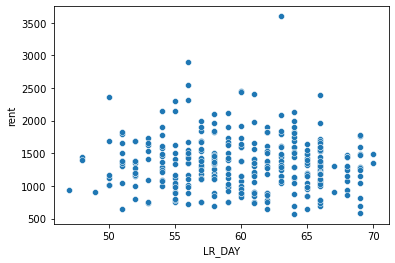

In [212]:
sns.scatterplot(data=df, x="LR_DAY", y = "rent")

<AxesSubplot:xlabel='LR_NIGHT', ylabel='rent'>

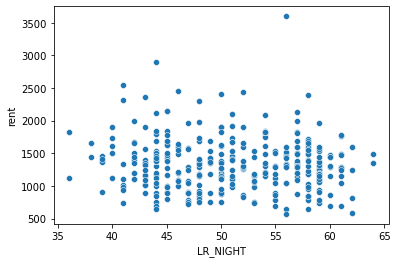

In [213]:
sns.scatterplot(data=df, x="LR_NIGHT", y = "rent")

### Quartier
Der Median ist bei allen Quartieren ähnlich.

[Text(0, 0, 'St.Georgen'),
 Text(1, 0, 'Langgass-Heiligkreuz'),
 Text(2, 0, 'Innenstadt'),
 Text(3, 0, 'Bruggen'),
 Text(4, 0, 'Linsenbühl-Dreilinden'),
 Text(5, 0, 'Rotmonten'),
 Text(6, 0, 'Riethüsli'),
 Text(7, 0, 'St.Jakob'),
 Text(8, 0, 'St.Fiden'),
 Text(9, 0, 'Lachen'),
 Text(10, 0, 'Neudorf'),
 Text(11, 0, 'Notkersegg'),
 Text(12, 0, 'Rosenberg'),
 Text(13, 0, 'Winkeln')]

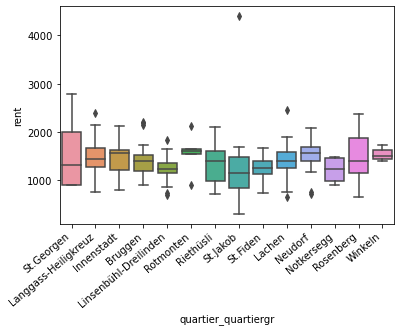

In [397]:
plt = sns.boxplot(x="quartier_quartiergr", y="rent", data=df)
plt.set_xticklabels(plt.get_xticklabels(), rotation=40, ha="right")

### Stockwerk

<AxesSubplot:xlabel='floor', ylabel='rent'>

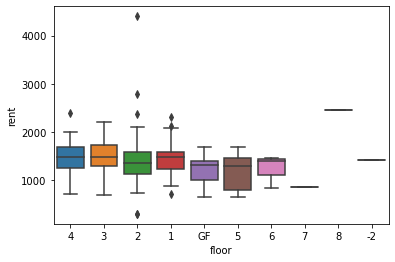

In [328]:
sns.boxplot(data=df, x="floor", y = "rent")

### Anzahl Supermärkte im 500m Radius

<AxesSubplot:xlabel='supermarketsnearby', ylabel='rent'>

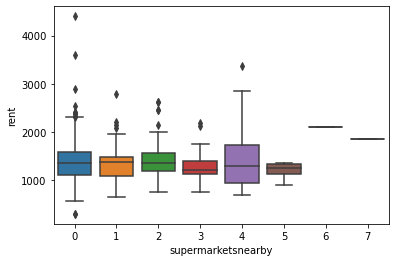

In [217]:
sns.boxplot(data=df, x="supermarketsnearby", y = "rent")

### Anzahl Erholungsorte im 500m Radius

<AxesSubplot:xlabel='leisurelocationsnearby', ylabel='rent'>

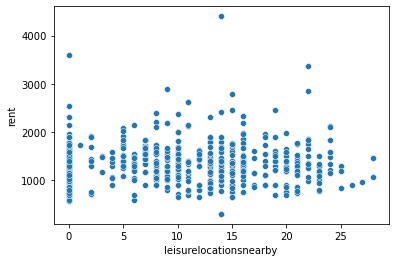

In [218]:
sns.scatterplot(data=df, x="leisurelocationsnearby", y = "rent")

### Anzahl Shops im 500m Radius

<AxesSubplot:xlabel='othershopsnearby', ylabel='rent'>

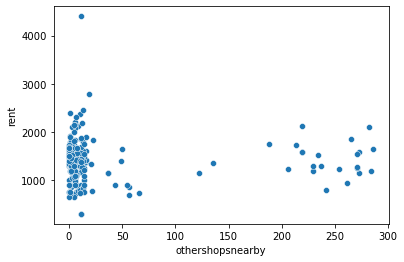

In [383]:
sns.scatterplot(data=df, x="othershopsnearby", y = "rent")

### Distanz zum nächsten Bahnhof

<AxesSubplot:xlabel='smallestdistancetonextoev', ylabel='rent'>

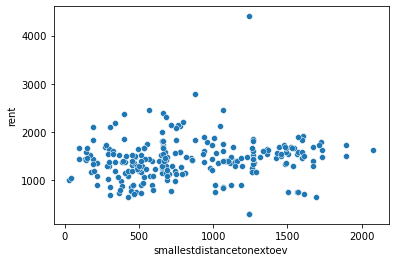

In [316]:
sns.scatterplot(data=df, x="smallestdistancetonextoev", y = "rent")

### Distanz zum Hauptbahnhof

<AxesSubplot:xlabel='distancetomainstation', ylabel='rent'>

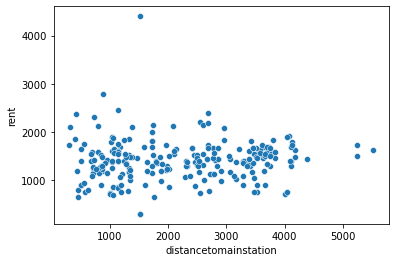

In [379]:
sns.scatterplot(data=df, x="distancetomainstation", y = "rent")

### Höhe

<AxesSubplot:xlabel='altitude', ylabel='rent'>

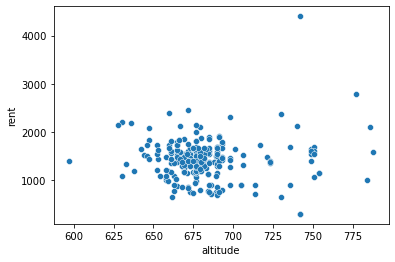

In [378]:
sns.scatterplot(data=df, x="altitude", y = "rent")

### Distanz zum nächsten Nachtclub

<AxesSubplot:xlabel='distancetonightclubs', ylabel='rent'>

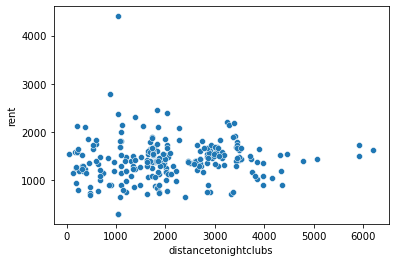

In [421]:
sns.scatterplot(data=df, x="distancetonightclubs", y = "rent")

## Modelling

Folgende Modelle wurden getestet: Lineare Regression, KNN Regression und Decision Tree Regression.

In [418]:
lregr = smf.ols(formula='rent ~ area + year_built + ren_potential + othershopsnearby + smallestdistancetonextoev + distancetomainstation + altitude', data=df).fit()
lregr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     30.28
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           1.07e-29
Time:                        18:23:44   Log-Likelihood:                -1741.1
No. Observations:                 244   AIC:                             3498.
Df Residuals:                     236   BIC:                             3526.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -665.3469   1059.702     -0.628      0.531   -2753.031    1422.338
ren_potential[T.True]       -17.6669     46.306     -0.382      0.703    -108.892      73.558
area                          9.2284      0.713     12.944      0.000       7.824      10.633
year_built                    0.7953      0.492      1.618      0.107      -0.173       1.764
othershopsnearby              0.9832      0.339      2.904      0.004       0.316       1.650
smallestdistancetonextoev     0.0169      0.050      0.336      0.738      -0.083       0.116
distancetomainstation         0.0254      0.024      1.046      0.296      -0.022       0.073
altitude                     -0.4623      0.795     -0.582      0.561      -2.028       1.103
==============================================================================
Omnibus:                      199.782   Durbin-Watson:                   2.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9706.232
Skew:                          -2.687   Prob(JB):                         0.00
Kurtosis:                      33.428   Cond. No.                     1.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Lineare Regression

In [436]:
predictorVariables = ['area', 'year_built', 'othershopsnearby']
regr = LinearRegression()
regr.fit(X=df_train[predictorVariables], y=df_train['rent'])
res = regr.score(X=df_test[predictorVariables], y=df_test['rent'])

res = regr.predict(X=df_test[predictorVariables])
print('Mean Error without square', np.sqrt(mean_squared_error(df_test['rent'], res)))

# Korrekter Mietpreis: 1745
print('berechneter Mietpreis', round(regr.predict([[100, 1900, 188]])[0]))

Mean Error without square 417.1179368491711
berechneter Mietpreis 1654


D:\Entwicklung\miniconda3\envs\hackathon\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [408]:
np.mean( (df.rent-np.mean(df.rent))**2 )

175374.00367844666

### KNN Regression

In [430]:
neigh = KNeighborsRegressor(n_neighbors=20)
neigh.fit(X=df_train[['area', 'year_built']], y=df_train['rent'])
neigh.score(X=df_test[['area', 'year_built']], y=df_test['rent'])

res = neigh.predict(X=df_test[['area', 'year_built']])
print('Mean Error without square ;)', np.sqrt(mean_squared_error(df_test['rent'], res)))

Mean Error without square ;) 440.85627272017047


### Decision Tree Regressor

In [431]:
decisionTree = DecisionTreeRegressor(random_state=0)
decisionTree.fit(X=df_train[['area', 'year_built']], y=df_train['rent'])
decisionTree.score(X=df_test[['area', 'year_built']], y=df_test['rent'])

res = decisionTree.predict(X=df_test[['area', 'year_built']])
print('Mean Error without square)', np.sqrt(mean_squared_error(df_test['rent'], res)))

Mean Error without square) 601.2783615205082
